In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5,5,11)
x

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [3]:
sigma = 2
y = 2*x + np.random.normal(loc=0, scale=sigma, size=11)
sig = sigma*np.ones(11)

<ErrorbarContainer object of 3 artists>

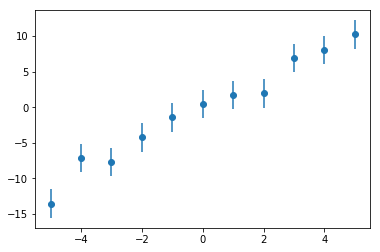

In [4]:
plt.errorbar(x,y,yerr=sig,fmt="o")

In [5]:
p1 = np.polyfit(x,y,1)
print(p1)

[ 2.17377439 -0.43151681]


In [6]:
p1poly = np.poly1d(p1)
yfit = p1poly(x)

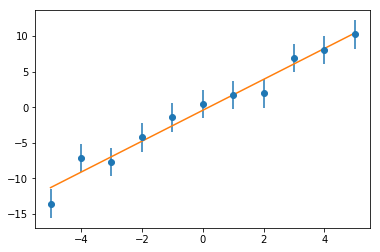

In [7]:
plt.errorbar(x,y,yerr=sig,fmt="o")
plt.plot(x,yfit)

In [8]:
y2 = 2*x + 0.1*x**2 + np.random.normal(loc=0,scale=sigma,size=11)

<ErrorbarContainer object of 3 artists>

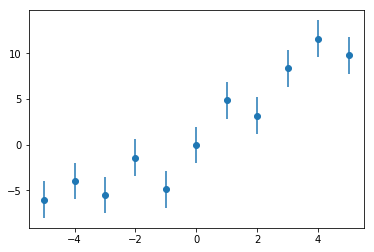

In [9]:
plt.errorbar(x,y2,yerr=sig,fmt="o")

In [10]:
p1 = np.polyfit(x,y2,1)
p2 = np.polyfit(x,y2,2)

In [11]:
print(p1)
print(p2)

[1.83619256 1.44198546]
[0.10459729 1.83619256 0.39601261]


In [12]:
xfit = np.linspace(-6,6,200)
yfit1 = np.poly1d(p1)(xfit)
yfit2 = np.poly1d(p2)(xfit)

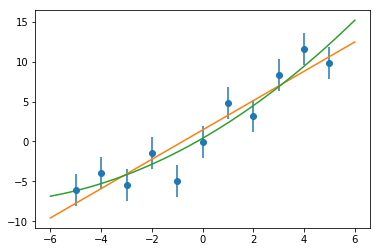

In [13]:
plt.errorbar(x,y2,yerr=sig,fmt="o")
plt.plot(xfit,yfit1)
plt.plot(xfit,yfit2)

(-20, 20)

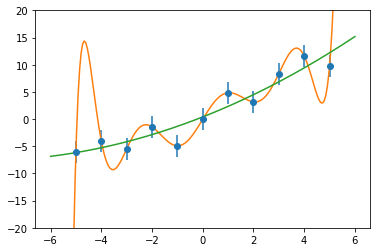

In [14]:
p10 = np.polyfit(x,y2,10)
yfit10 = np.poly1d(p10)(xfit)
plt.errorbar(x,y2,yerr=sig,fmt="o")
plt.plot(xfit,yfit10)
plt.plot(xfit,yfit2)
plt.ylim((-20,20))

In [15]:
chisq_list = []
for i in range(1000):
    y = 2*x + 0.1*x**2+ np.random.normal(0,1,11)
    p = np.polyfit(x,y,2)
    res = y - p[2]- p[1]*x - p[0]*x**2
    chisq_list.append(np.sum(res**2))
chisq_list = np.array(chisq_list)

In [18]:
from scipy.stats import chi2
chi = np.linspace(0,30,200)
chi2dist = chi2.pdf(chi,8)

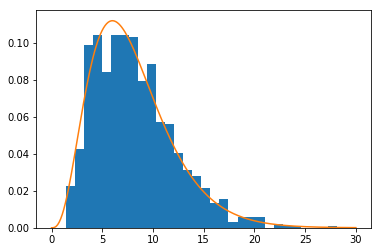

In [19]:
plt.hist(chisq_list,bins=30,density=True)
plt.plot(chi,chi2dist)

In [17]:
chisq_list.mean()

8.209983394027537

In [20]:
chisq_list = []
for i in range(1000):
    y = 2*x + 0.1*x**2+ np.random.normal(0,1,11)
    p = np.polyfit(x,y,1)
    res = y - p[1]- p[0]*x
    chisq_list.append(np.sum(res**2))
chisq_list = np.array(chisq_list)

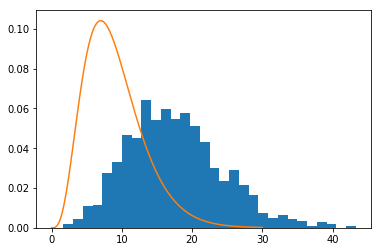

In [22]:
chi2dist = chi2.pdf(chi,9)
plt.hist(chisq_list,bins=30,density=True)
plt.plot(chi,chi2dist)

In [33]:
sigma = 1
y = 2*x + np.random.normal(loc=0, scale=sigma, size=11)
sig = sigma*np.ones(11)

In [39]:
# lets plot the chi-square function
m = np.linspace(1,3,401)
b = np.linspace(-1,1,401)

M,B = np.meshgrid(m,b)

In [30]:
def chi2linefit(M,B,datax,datay):
    res1 = M*datax[:,np.newaxis,np.newaxis]+B
    res2 = (datay-res1.T).T
    res2 = res2**2
    chisquare = np.sum(res2,axis=0)
    return chisquare

In [36]:
print(np.polyfit(x,y,1))

[2.08363747 0.09803958]


In [40]:
Z = chi2linefit(M,B,x,y)

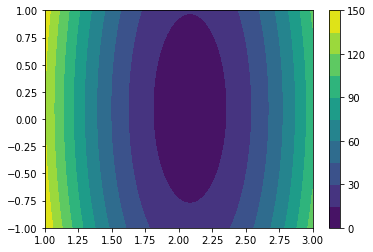

In [41]:
plt.contourf(M,B,Z,10)
plt.colorbar()